In [4]:
import pandas as pd

#주어진 데이터 사용 2021년 데이터
data = pd.read_csv("C:/Users/user/Desktop/2021.12_상권 지역별 업종별 데이터.csv",encoding='euc-kr')

df = pd.DataFrame(data)

df = df.rename(columns={'strd_yymm': '기준년월', 'adng_no': '행정동번호', 'tz_area_val': '집계구역값',
                        'std_ind_ctgo_val': '표준산업분류값', 'std_ind_ctgo_nm': '표준산업분류명',
                        'wkind_scal_nr_val': '종사자규모구간값', 'samt_scal_nr_val': '매출액규모구간값', 
                        'bizr_num': '사업자수'})


df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202112,2101051,2101051010001,14111,남자용 정장 제조업,1-4명,1-49백만원,1
1,202112,2101051,2101051010001,14112,여자용 정장 제조업,1-4명,1-49백만원,1
2,202112,2101051,2101051010001,17901,문구용 종이제품 제조업,5-9명,100-499백만원,1
3,202112,2101051,2101051010001,18111,경 인쇄업,1-4명,1-49백만원,10
4,202112,2101051,2101051010001,18111,경 인쇄업,1-4명,100-499백만원,3
...,...,...,...,...,...,...,...,...
152543,202112,2131013,2131013210003,96112,두발미용업,1-4명,1-49백만원,1
152544,202112,2131013,2131013210101,56111,한식 음식점업,5-9명,1-49백만원,1
152545,202112,2131013,2131013210101,56220,비알콜 음료점업,1-4명,1-49백만원,1
152546,202112,2131013,2131013210101,59111,일반 영화 및 비디오물 제작업,1-4명,50-99백만원,1


In [5]:
# 종사자 규모 구간값을 중위값으로 바꿉니다.
df['종사자규모구간값'] = df['종사자규모구간값'].replace({'1-4명': 3, '5-9명': 7, '10-19명': 15,
                                                  '20-49명': 35, '50-99명': 75, '100-199명': 150,
                                                  '200-299명': 250, '300명 이상': 300})

# 매출액규모구간값을 중위값으로 바꿉니다.
df['매출액규모구간값'] = df['매출액규모구간값'].replace({'1-49백만원': 25000000, '50-99백만원': 75000000,
                                                    '100-499백만원': 300000000, '500-999백만원': 750000000,
                                                    '1000-4999백만원': 3000000000, '5000-9999백만원': 7500000000,
                                                    '10000-49999백만원': 30000000000, '50000백만원이상': 50000000000})

# 변경된 값을 숫자로 형변환합니다.
df['종사자규모구간값'] = pd.to_numeric(df['종사자규모구간값'])
df['매출액규모구간값'] = pd.to_numeric(df['매출액규모구간값'])
df['사업자수'] = pd.to_numeric(df['사업자수'])
# 변경된 DataFrame을 출력합니다.

df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202112,2101051,2101051010001,14111,남자용 정장 제조업,3,25000000,1
1,202112,2101051,2101051010001,14112,여자용 정장 제조업,3,25000000,1
2,202112,2101051,2101051010001,17901,문구용 종이제품 제조업,7,300000000,1
3,202112,2101051,2101051010001,18111,경 인쇄업,3,25000000,10
4,202112,2101051,2101051010001,18111,경 인쇄업,3,300000000,3
...,...,...,...,...,...,...,...,...
152543,202112,2131013,2131013210003,96112,두발미용업,3,25000000,1
152544,202112,2131013,2131013210101,56111,한식 음식점업,7,25000000,1
152545,202112,2131013,2131013210101,56220,비알콜 음료점업,3,25000000,1
152546,202112,2131013,2131013210101,59111,일반 영화 및 비디오물 제작업,3,75000000,1


In [6]:
# 계산
df['사업자 1인당 수익'] = ((df['매출액규모구간값'] / 12 - df['종사자규모구간값'] * 2500000)
                           / df['사업자수'])

# 소수점을 반올림하여 정수로 변환
df['사업자 1인당 수익'] = df['사업자 1인당 수익'].apply(lambda x: "{:.0f}".format(x))

df


# 사업자 1인당 수익이 음수인 행 제거
df['사업자 1인당 수익'] = pd.to_numeric(df['사업자 1인당 수익'])
df = df[df['사업자 1인당 수익'] >= 0]
df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
2,202112,2101051,2101051010001,17901,문구용 종이제품 제조업,7,300000000,1,7500000
4,202112,2101051,2101051010001,18111,경 인쇄업,3,300000000,3,5833333
7,202112,2101051,2101051010001,18112,스크린 인쇄업,7,300000000,1,7500000
9,202112,2101051,2101051010001,18119,기타 인쇄업,3,300000000,2,8750000
10,202112,2101051,2101051010001,18119,기타 인쇄업,7,750000000,1,45000000
...,...,...,...,...,...,...,...,...,...
152535,202112,2131013,2131013210003,56120,기관구내식당업,7,300000000,1,7500000
152536,202112,2131013,2131013210003,68112,비주거용 건물 임대업,3,300000000,1,17500000
152538,202112,2131013,2131013210003,71511,제조업 회사본부,3,300000000,1,17500000
152539,202112,2131013,2131013210003,71519,기타 산업 회사본부,3,3000000000,1,242500000


In [7]:
# 사업자 1인당 수익이 음수인 행 제거
df['사업자 1인당 수익'] = pd.to_numeric(df['사업자 1인당 수익'])
df = df[df['사업자 1인당 수익'] >= 0]
df

C:\Users\user\AppData\Local\Temp\ipykernel_9388\196632204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['사업자 1인당 수익'] = pd.to_numeric(df['사업자 1인당 수익'])


,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
2,202112,2101051,2101051010001,17901,문구용 종이제품 제조업,7,300000000,1,7500000
4,202112,2101051,2101051010001,18111,경 인쇄업,3,300000000,3,5833333
7,202112,2101051,2101051010001,18112,스크린 인쇄업,7,300000000,1,7500000
9,202112,2101051,2101051010001,18119,기타 인쇄업,3,300000000,2,8750000
10,202112,2101051,2101051010001,18119,기타 인쇄업,7,750000000,1,45000000
...,...,...,...,...,...,...,...,...,...
152535,202112,2131013,2131013210003,56120,기관구내식당업,7,300000000,1,7500000
152536,202112,2131013,2131013210003,68112,비주거용 건물 임대업,3,300000000,1,17500000
152538,202112,2131013,2131013210003,71511,제조업 회사본부,3,300000000,1,17500000
152539,202112,2131013,2131013210003,71519,기타 산업 회사본부,3,3000000000,1,242500000


In [8]:
# '행정동번호'와 '표준산업분류값' 열 삭제
df = df.drop(['행정동번호','표준산업분류값'], axis=1)
df

,기준년월,집계구역값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
2,202112,2101051010001,문구용 종이제품 제조업,7,300000000,1,7500000
4,202112,2101051010001,경 인쇄업,3,300000000,3,5833333
7,202112,2101051010001,스크린 인쇄업,7,300000000,1,7500000
9,202112,2101051010001,기타 인쇄업,3,300000000,2,8750000
10,202112,2101051010001,기타 인쇄업,7,750000000,1,45000000
...,...,...,...,...,...,...,...
152535,202112,2131013210003,기관구내식당업,7,300000000,1,7500000
152536,202112,2131013210003,비주거용 건물 임대업,3,300000000,1,17500000
152538,202112,2131013210003,제조업 회사본부,3,300000000,1,17500000
152539,202112,2131013210003,기타 산업 회사본부,3,3000000000,1,242500000


In [15]:
# 사업자 1인당 소득을 기반으로 소득분위 나누기
income_thresholds = df['사업자 1인당 수익'].quantile([0.25, 0.5, 0.75])

# 소득분위 구분 함수
def get_income_category(income):
    if income <= income_thresholds[0.25]:
        return 1
    elif income <= income_thresholds[0.5]:
        return 2
    elif income <= income_thresholds[0.75]:
        return 3
    else:
        return 4

# '소득분위' 열 추가
df['소득분위'] = df['사업자 1인당 수익'].apply(get_income_category)

# 결과 확인
df

,기준년월,집계구역값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익,소득분위
2,202112,2101051010001,문구용 종이제품 제조업,7,300000000,1,7500000,1
4,202112,2101051010001,경 인쇄업,3,300000000,3,5833333,1
7,202112,2101051010001,스크린 인쇄업,7,300000000,1,7500000,1
9,202112,2101051010001,기타 인쇄업,3,300000000,2,8750000,1
10,202112,2101051010001,기타 인쇄업,7,750000000,1,45000000,3
...,...,...,...,...,...,...,...,...
152535,202112,2131013210003,기관구내식당업,7,300000000,1,7500000,1
152536,202112,2131013210003,비주거용 건물 임대업,3,300000000,1,17500000,1
152538,202112,2131013210003,제조업 회사본부,3,300000000,1,17500000,1
152539,202112,2131013210003,기타 산업 회사본부,3,3000000000,1,242500000,4


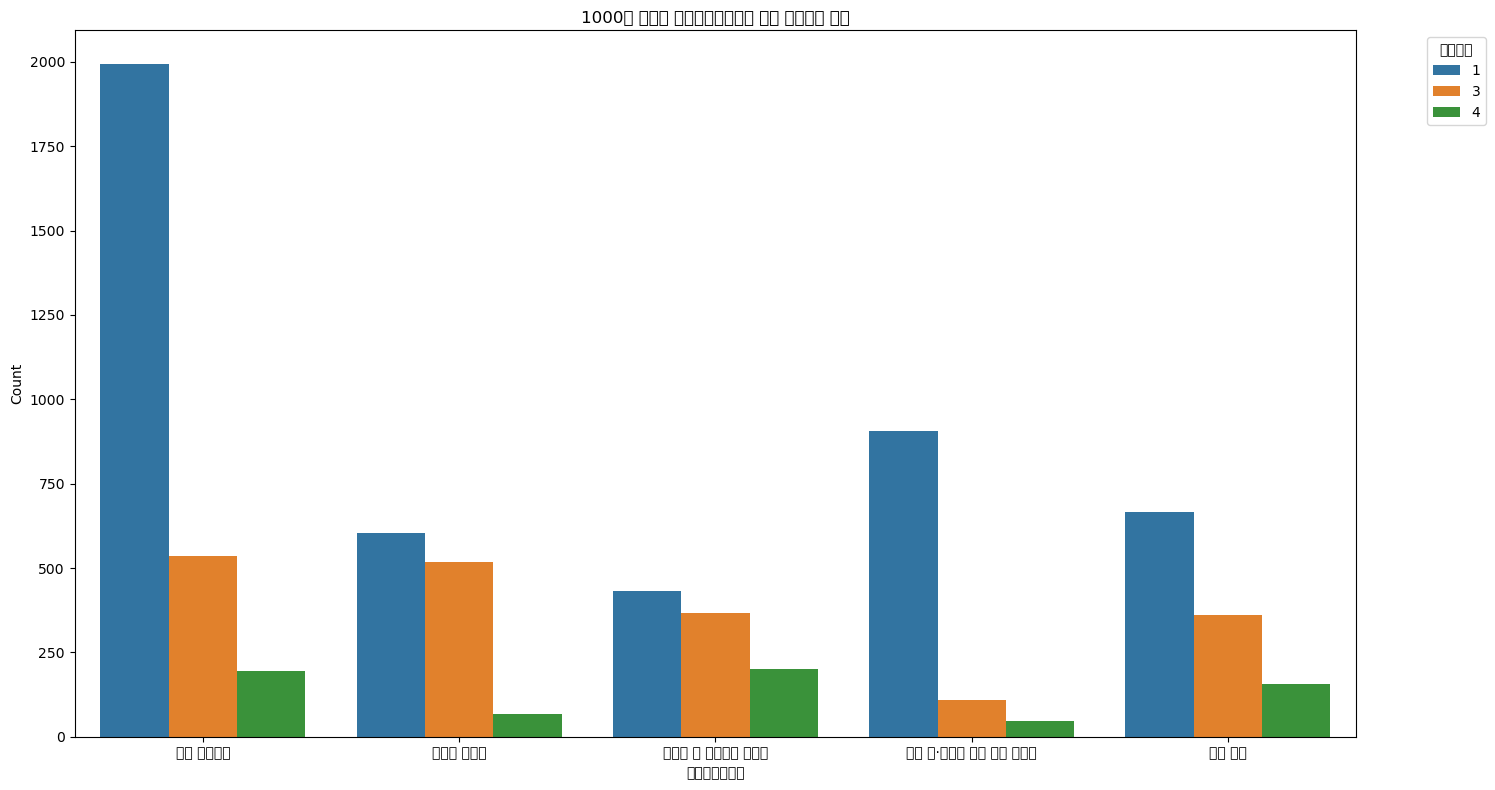

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Mac에서는 AppleGothic을 사용)
plt.rcParams['font.family'] = 'AppleGothic'
# 1000개 이상인 표준산업분류명 필터링
industry_counts = df['표준산업분류명'].value_counts()
industry_counts_filtered = industry_counts[industry_counts > 1000]
df_filtered = df[df['표준산업분류명'].isin(industry_counts_filtered.index)]

# 1000개 이상인 표준산업분류명에 대한 소득분위 분포 확인
plt.figure(figsize=(15, 8))
sns.countplot(x='표준산업분류명', hue='소득분위', data=df_filtered)
plt.title('1000개 이상인 표준산업분류명에 대한 소득분위 분포')
plt.xlabel('표준산업분류명')
plt.ylabel('Count')
plt.xticks(rotation=360, ha='center')  # 텍스트를 오른쪽으로 90도 회전
plt.legend(title='소득분위', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # 그래프가 잘리지 않도록 조절
plt.show()

In [46]:
# 소득분위를 기준으로 데이터 정렬
df_sorted = df.sort_values(by='사업자 1인당 수익', ascending=False)

# 상위 1%에 해당하는 데이터 가져오기
top_10_percent = df_sorted.head(int(len(df) * 0.01))

# 결과 출력
print("상위 1% 지역:")
print(top_10_percent[['기준년월', '집계구역값', '표준산업분류명', '사업자 1인당 수익']])

상위 1% 지역:
          기준년월          집계구역값             표준산업분류명  사업자 1인당 수익
112756  202112  2112056110001         1차 금속제품 도매업  4129166667
116907  202112  2113052010001     액체연료 및 관련제품 도매업  4129166667
126947  202112  2114053010018             아파트 건설업  4129166667
114300  202112  2112058010001       도로 및 관련시설 운영업  4129166667
25464   202112  2105057010003              직원훈련기관  4129166667
...        ...            ...                 ...         ...
34169   202112  2105081020005                국내은행  2462500000
740     202112  2101051020001  기타 화학물질 및 화학제품 도매업  2462500000
133984  202112  2115052030001                국내은행  2462500000
104207  202112  2111073030001          자동차 신품 판매업  2462500000
83894   202112  2110054030001          자동차 신품 판매업  2462500000

[708 rows x 4 columns]


In [22]:
import pandas as pd

# 주어진 데이터 사용 (2021년 데이터)
data = pd.read_csv("C:/Users/user/Desktop/2021.12_상권 지역별 업종별 데이터.csv", encoding='euc-kr')

df = pd.DataFrame(data)

df = df.rename(columns={'strd_yymm': '기준년월', 'adng_no': '행정동번호', 'tz_area_val': '집계구역값',
                        'std_ind_ctgo_val': '표준산업분류값', 'std_ind_ctgo_nm': '표준산업분류명',
                        'wkind_scal_nr_val': '종사자규모구간값', 'samt_scal_nr_val': '매출액규모구간값', 
                        'bizr_num': '사업자수'})

# 시작 값과 끝 값 정의
start_value = df['집계구역값'].min()
end_value = df['집계구역값'].max()

# 간격 계산
interval = (end_value - start_value + 1) // 10

# 1부터 10까지의 숫자로 대체
df['집계구역값'] = pd.cut(df['집계구역값'], bins=range(start_value, end_value+interval, interval), labels=range(1, 11), include_lowest=True)

# 결과 출력
df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202112,2101051,1,14111,남자용 정장 제조업,1-4명,1-49백만원,1
1,202112,2101051,1,14112,여자용 정장 제조업,1-4명,1-49백만원,1
2,202112,2101051,1,17901,문구용 종이제품 제조업,5-9명,100-499백만원,1
3,202112,2101051,1,18111,경 인쇄업,1-4명,1-49백만원,10
4,202112,2101051,1,18111,경 인쇄업,1-4명,100-499백만원,3
...,...,...,...,...,...,...,...,...
152543,202112,2131013,10,96112,두발미용업,1-4명,1-49백만원,1
152544,202112,2131013,10,56111,한식 음식점업,5-9명,1-49백만원,1
152545,202112,2131013,10,56220,비알콜 음료점업,1-4명,1-49백만원,1
152546,202112,2131013,10,59111,일반 영화 및 비디오물 제작업,1-4명,50-99백만원,1


In [23]:
# 종사자 규모 구간값을 중위값으로 바꿉니다.
df['종사자규모구간값'] = df['종사자규모구간값'].replace({'1-4명': 3, '5-9명': 7, '10-19명': 15,
                                                  '20-49명': 35, '50-99명': 75, '100-199명': 150,
                                                  '200-299명': 250, '300명 이상': 300})

# 매출액규모구간값을 중위값으로 바꿉니다.
df['매출액규모구간값'] = df['매출액규모구간값'].replace({'1-49백만원': 25000000, '50-99백만원': 75000000,
                                                    '100-499백만원': 300000000, '500-999백만원': 750000000,
                                                    '1000-4999백만원': 3000000000, '5000-9999백만원': 7500000000,
                                                    '10000-49999백만원': 30000000000, '50000백만원이상': 50000000000})

# 변경된 값을 숫자로 형변환합니다.
df['종사자규모구간값'] = pd.to_numeric(df['종사자규모구간값'])
df['매출액규모구간값'] = pd.to_numeric(df['매출액규모구간값'])

# 변경된 DataFrame을 출력합니다.
df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202112,2101051,1,14111,남자용 정장 제조업,3,25000000,1
1,202112,2101051,1,14112,여자용 정장 제조업,3,25000000,1
2,202112,2101051,1,17901,문구용 종이제품 제조업,7,300000000,1
3,202112,2101051,1,18111,경 인쇄업,3,25000000,10
4,202112,2101051,1,18111,경 인쇄업,3,300000000,3
...,...,...,...,...,...,...,...,...
152543,202112,2131013,10,96112,두발미용업,3,25000000,1
152544,202112,2131013,10,56111,한식 음식점업,7,25000000,1
152545,202112,2131013,10,56220,비알콜 음료점업,3,25000000,1
152546,202112,2131013,10,59111,일반 영화 및 비디오물 제작업,3,75000000,1


In [24]:
# 계산
df['사업자 1인당 수익'] = ((df['매출액규모구간값'] / 12 - df['종사자규모구간값'] * 2500000)
                           / df['사업자수'])

# 소수점을 반올림하여 정수로 변환
df['사업자 1인당 수익'] = df['사업자 1인당 수익'].apply(lambda x: "{:.0f}".format(x))

df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
0,202112,2101051,1,14111,남자용 정장 제조업,3,25000000,1,-5416667
1,202112,2101051,1,14112,여자용 정장 제조업,3,25000000,1,-5416667
2,202112,2101051,1,17901,문구용 종이제품 제조업,7,300000000,1,7500000
3,202112,2101051,1,18111,경 인쇄업,3,25000000,10,-541667
4,202112,2101051,1,18111,경 인쇄업,3,300000000,3,5833333
...,...,...,...,...,...,...,...,...,...
152543,202112,2131013,10,96112,두발미용업,3,25000000,1,-5416667
152544,202112,2131013,10,56111,한식 음식점업,7,25000000,1,-15416667
152545,202112,2131013,10,56220,비알콜 음료점업,3,25000000,1,-5416667
152546,202112,2131013,10,59111,일반 영화 및 비디오물 제작업,3,75000000,1,-1250000


In [25]:
# 사업자 1인당 수익이 음수인 행 제거
df['사업자 1인당 수익'] = pd.to_numeric(df['사업자 1인당 수익'])
df = df[df['사업자 1인당 수익'] >= 0]
df

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
2,202112,2101051,1,17901,문구용 종이제품 제조업,7,300000000,1,7500000
4,202112,2101051,1,18111,경 인쇄업,3,300000000,3,5833333
7,202112,2101051,1,18112,스크린 인쇄업,7,300000000,1,7500000
9,202112,2101051,1,18119,기타 인쇄업,3,300000000,2,8750000
10,202112,2101051,1,18119,기타 인쇄업,7,750000000,1,45000000
...,...,...,...,...,...,...,...,...,...
152535,202112,2131013,10,56120,기관구내식당업,7,300000000,1,7500000
152536,202112,2131013,10,68112,비주거용 건물 임대업,3,300000000,1,17500000
152538,202112,2131013,10,71511,제조업 회사본부,3,300000000,1,17500000
152539,202112,2131013,10,71519,기타 산업 회사본부,3,3000000000,1,242500000


In [26]:
df=df.drop('행정동번호',axis=1)
df

,기준년월,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익
2,202112,1,17901,문구용 종이제품 제조업,7,300000000,1,7500000
4,202112,1,18111,경 인쇄업,3,300000000,3,5833333
7,202112,1,18112,스크린 인쇄업,7,300000000,1,7500000
9,202112,1,18119,기타 인쇄업,3,300000000,2,8750000
10,202112,1,18119,기타 인쇄업,7,750000000,1,45000000
...,...,...,...,...,...,...,...,...
152535,202112,10,56120,기관구내식당업,7,300000000,1,7500000
152536,202112,10,68112,비주거용 건물 임대업,3,300000000,1,17500000
152538,202112,10,71511,제조업 회사본부,3,300000000,1,17500000
152539,202112,10,71519,기타 산업 회사본부,3,3000000000,1,242500000


In [27]:
# 사업자 1인당 소득을 기반으로 소득분위 나누기
income_thresholds = df['사업자 1인당 수익'].quantile([0.25, 0.5, 0.75])

# 소득분위 구분 함수
def get_income_category(income):
    if income <= income_thresholds[0.25]:
        return 1
    elif income <= income_thresholds[0.5]:
        return 0
    elif income <= income_thresholds[0.75]:
        return 2
    else:
        return 3

# '소득분위' 열 추가
df['소득분위'] = df['사업자 1인당 수익'].apply(get_income_category)

# 결과 확인
df

,기준년월,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익,소득분위
2,202112,1,17901,문구용 종이제품 제조업,7,300000000,1,7500000,1
4,202112,1,18111,경 인쇄업,3,300000000,3,5833333,1
7,202112,1,18112,스크린 인쇄업,7,300000000,1,7500000,1
9,202112,1,18119,기타 인쇄업,3,300000000,2,8750000,1
10,202112,1,18119,기타 인쇄업,7,750000000,1,45000000,2
...,...,...,...,...,...,...,...,...,...
152535,202112,10,56120,기관구내식당업,7,300000000,1,7500000,1
152536,202112,10,68112,비주거용 건물 임대업,3,300000000,1,17500000,1
152538,202112,10,71511,제조업 회사본부,3,300000000,1,17500000,1
152539,202112,10,71519,기타 산업 회사본부,3,3000000000,1,242500000,3


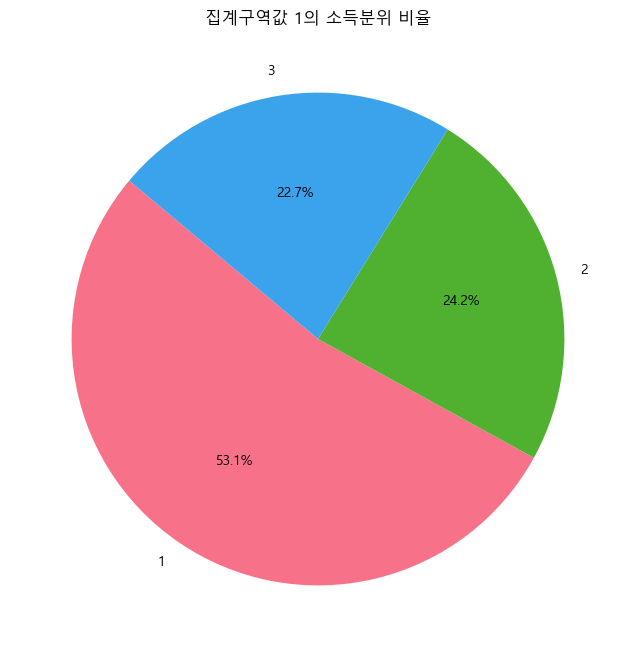

In [29]:
#집계구역값에 따른 소득분위 분포도 알기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (설치된 폰트의 경로로 변경)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 예시: 맑은 고딕 폰트의 경로

# 폰트 매니저에 폰트 경로 설정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()


# 집계구역값 1에 대한 소득분위 비율 계산
income_ratio = df[df['집계구역값'] == 5]['소득분위'].value_counts(normalize=True) * 100

# seaborn에서 제공하는 색상 팔레트 사용
colors = sns.color_palette('husl', n_colors=len(income_ratio))

# 원형 그래프로 표시
plt.figure(figsize=(8, 8))
plt.pie(income_ratio, labels=income_ratio.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('집계구역값 1의 소득분위 비율')
plt.show()

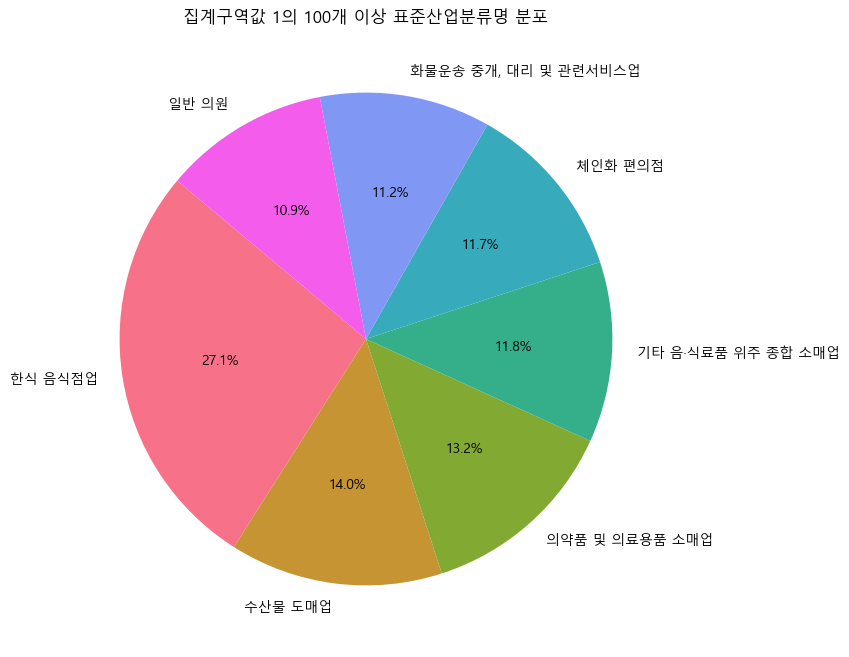

In [30]:
#집계구역값에 따른 표준산업분류명 분포도
import matplotlib.pyplot as plt
import seaborn as sns

# 표준산업분류명이 $필터링
industry_counts = df[df['집계구역값'] == 1]['표준산업분류명'].value_counts()
industry_counts_filtered = industry_counts[industry_counts >= 100]

# seaborn에서 제공하는 색상 팔레트 사용
colors = sns.color_palette('husl', n_colors=len(industry_counts_filtered))

# 원형 그래프로 표시
plt.figure(figsize=(8, 8))
plt.pie(industry_counts_filtered, labels=industry_counts_filtered.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('집계구역값 1의 100개 이상 표준산업분류명 분포')
plt.show()

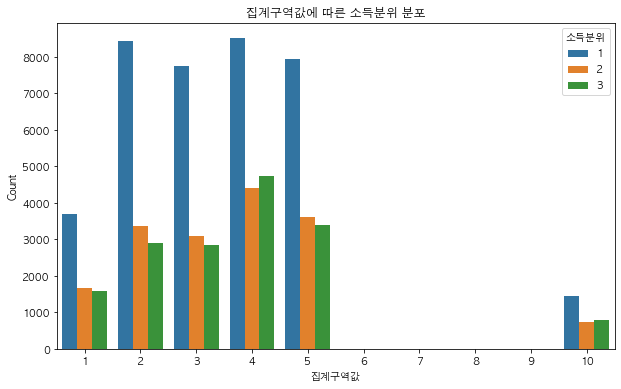

In [57]:
# 집계구역값에 따른 소득분위 분포를 막대그래프로 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='집계구역값', hue='소득분위', data=df)
plt.title('집계구역값에 따른 소득분위 분포')
plt.xlabel('집계구역값')
plt.ylabel('Count')
plt.show()

In [33]:
# 직접 설정한 집계구역값
selected_area_value = 1  # 예시로 1로 설정

# 소득분위가 높은 집계구역 찾기
high_income_areas = df[(df['소득분위'] == 3) & (df['집계구역값'] == selected_area_value)]

# 찾은 집계구역에서 현재 표준산업 확인
current_industries = high_income_areas['표준산업분류명'].value_counts()

# 해당 집계구역에서 소득분위가 높으면서 별로 없는 표준산업 찾기
threshold = 10
low_frequency_industries = current_industries[current_industries < threshold]

# 결과 출력
print("설정한 집계구역에서 주로 나타나는 표준산업:")
print(current_industries)

print("\n소득분위가 높으면서 별로 없는 표준산업:")
print(low_frequency_industries)

설정한 집계구역에서 주로 나타나는 표준산업:
국내은행                      47
수산물 도매업                   38
화물운송 중개, 대리 및 관련서비스업      36
신용조합                      35
의약품 및 의료용품 소매업            32
                          ..
사적지 관리 운영업                 1
플라스틱 선, 봉, 관 및 호스 제조업      1
금속 문, 창, 셔터 및 관련제품 제조업     1
안경 제조업                     1
기계장비 조립용 플라스틱제품 제조업        1
Name: 표준산업분류명, Length: 346, dtype: int64

소득분위가 높으면서 별로 없는 표준산업:
도료 도매업                    9
일반 고등학교                   9
기타 자동차신품 부품 및 내장품 판매업     9
가전제품 및 부품 도매업             9
그외 기타 건축자재 도매업            8
                         ..
사적지 관리 운영업                1
플라스틱 선, 봉, 관 및 호스 제조업     1
금속 문, 창, 셔터 및 관련제품 제조업    1
안경 제조업                    1
기계장비 조립용 플라스틱제품 제조업       1
Name: 표준산업분류명, Length: 302, dtype: int64


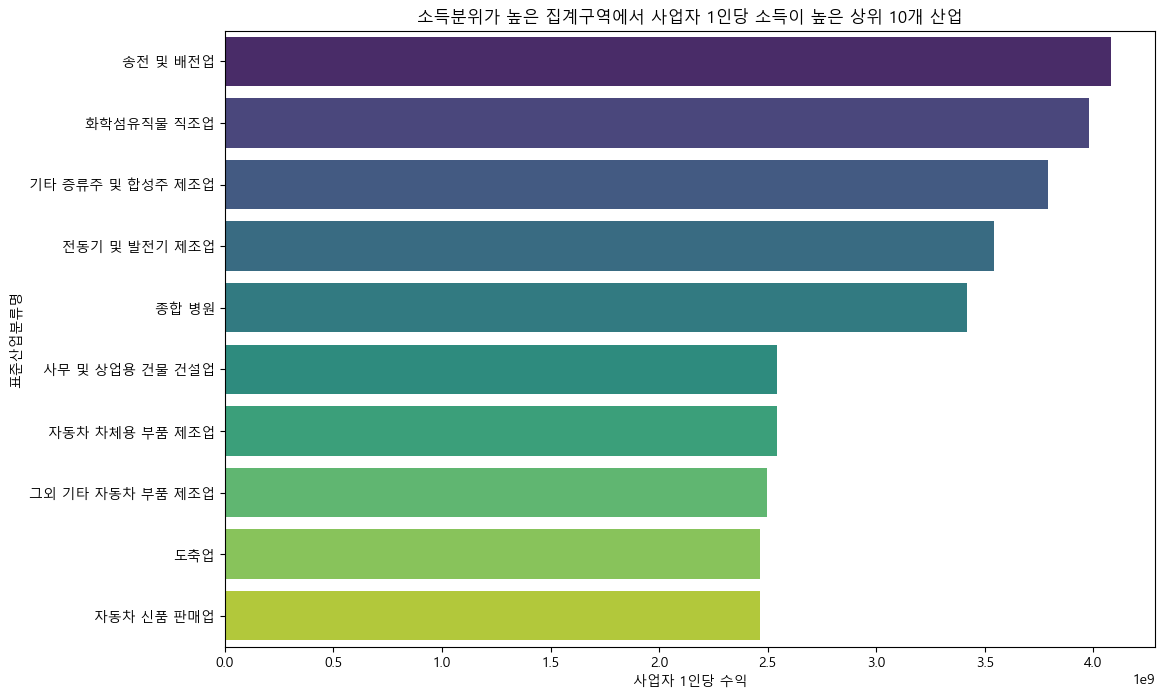

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 소득분위가 3이면서 집계구역값이 2인 데이터 선택
high_income_and_area2 = df[(df['소득분위'] == 3) & (df['집계구역값'] == 10)]



# 선택한 집계구역에서 사업자 1인당 소득이 높은 산업 상위 10개
top_industries = high_income_and_area2.groupby('표준산업분류명')['사업자 1인당 수익'].mean().sort_values(ascending=False).head(10)

# 그래프 작성
plt.figure(figsize=(12, 8))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='viridis')
plt.title('소득분위가 높은 집계구역에서 사업자 1인당 소득이 높은 상위 10개 산업')
plt.xlabel('사업자 1인당 수익')
plt.ylabel('표준산업분류명')
plt.show()